# Utilizando a base de dados de um Plano de Saúde, faremos a previsão do valor do plano para cada um de seus clientes.

## 1º Análise exploratória

In [ ]:
# Importando as bibliotecas:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Lendo o arquivo .CSV e visualizando seus 5 primeiros valores:
train_data = pd.read_csv('Train_Data.csv')
train_data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [ ]:
# Mudando o nome das colunas:
train_data.columns = ["Idade", "Sexo", "IMC", "Fumante", "Região", "Qnt. filhos(as)", "Valor"]
train_data

,Idade,Sexo,IMC,Fumante,Região,Qnt. filhos(as),Valor
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900
...,...,...,...,...,...,...,...
3625,48.820767,female,41.426984,no,northwest,4,10987.324964
3626,38.661977,female,26.202557,no,southeast,2,11735.844352
3627,56.000000,male,40.300000,no,southwest,0,10602.385000
3628,48.061207,female,34.930624,no,southeast,1,8976.140452


In [ ]:
# Encontrando dados faltantes:
train_data.isnull().sum()

Idade              0
Sexo               0
IMC                0
Fumante            0
Região             0
Qnt. filhos(as)    0
Valor              0
dtype: int64

In [ ]:
# Tipos de variáveis e dimensão do dataframe:
train_data.info()
#### Como existem variáveis 'objetct', será necessário fazer um tratamento p/ aplicar o algoritmo (transformá-las em numéricas).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Idade            3630 non-null   float64
 1   Sexo             3630 non-null   object 
 2   IMC              3630 non-null   float64
 3   Fumante          3630 non-null   object 
 4   Região           3630 non-null   object 
 5   Qnt. filhos(as)  3630 non-null   int64  
 6   Valor            3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [ ]:
# Detalhes estatísticos básicos:
train_data.describe()
#### A maior parte das variáveis estão tendendo à distribuição normal, ou seja, tendem à ser confiáveis.

,Idade,IMC,Qnt. filhos(as),Valor
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Detalhes das variáveis categóricas:
train_data.describe(include=['O'])

,Sexo,Fumante,Região
count,3630,3630,3630
unique,2,2,4
top,male,no,southeast
freq,2029,3070,1021


#### Idade

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Idade dos clientes (Boxplot)')

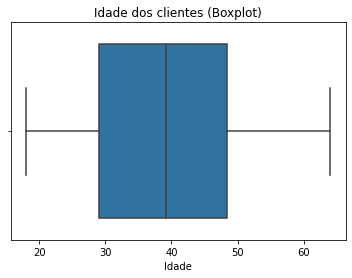

In [ ]:
# Boxplot da idade dos clientes:
sns.boxplot(train_data.Idade)
plt.title('Idade dos clientes (Boxplot)')
#### Não existem outliers.

Text(0.5, 1.0, 'Idade dos clientes')

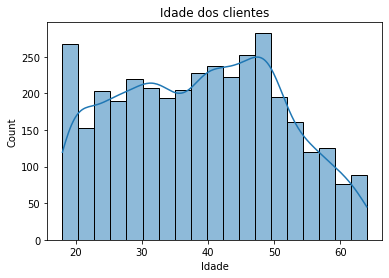

In [ ]:
# Histrograma da idade dos clientes:
sns.histplot(train_data.Idade, kde=True)
plt.title('Idade dos clientes')

#### Sexo

Text(0.5, 1.0, 'Sexo dos clientes')

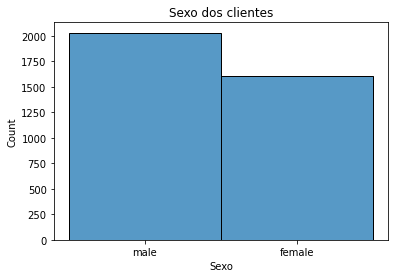

In [ ]:
# Histrograma do sexo dos clientes:
sns.histplot(train_data.Sexo)
plt.title('Sexo dos clientes')

#### IMC

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Índice de Massa Corpórea - IMC (Boxplot)')

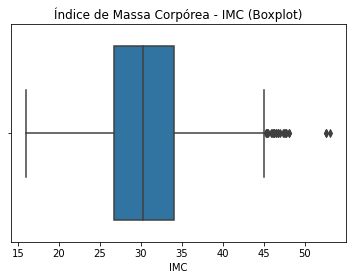

In [ ]:
# Boxplot do Índice de Massa Corpórea (IMC):
sns.boxplot(train_data.IMC)
plt.title('Índice de Massa Corpórea - IMC (Boxplot)')
#### Existem outliers à direita. Ou seja, alguns clientes tem o IMC consideravelmente maior (o que não é um problema nesse caso).

Text(0.5, 1.0, 'Índice de Massa Corpórea - IMC')

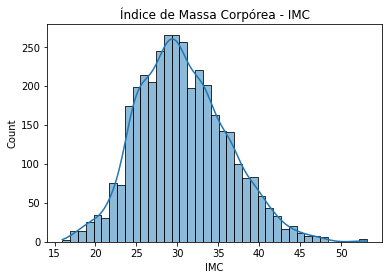

In [ ]:
# Histrograma do Índice de Massa Corpórea (IMC):
sns.histplot(train_data.IMC, kde=True)
plt.title('Índice de Massa Corpórea - IMC')

#### Fumante

Text(0.5, 1.0, 'Fumante')

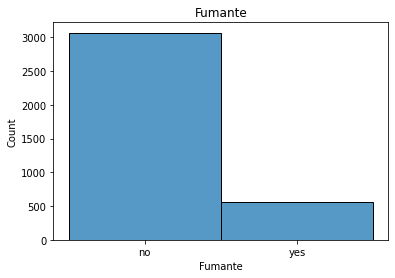

In [ ]:
# Histrograma da quantidade de fumantes:
sns.histplot(train_data.Fumante)
plt.title('Fumante')

#### Região

Text(0.5, 1.0, 'Região dos clientes')

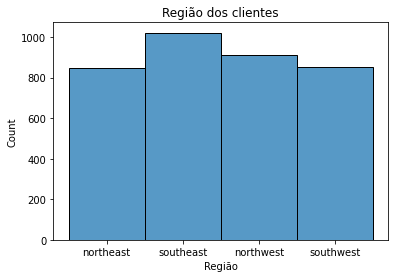

In [ ]:
# Histrograma da região dos clientes:
sns.histplot(train_data.Região)
plt.title('Região dos clientes')

#### Qnt. filhos(as)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Quantidade de filhos(as) (Boxplot)')

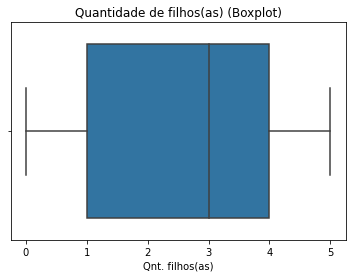

In [ ]:
# Boxplot da quantidade de filhos(as):
sns.boxplot(train_data['Qnt. filhos(as)'])
plt.title('Quantidade de filhos(as) (Boxplot)')
#### Não existem outliers.

Text(0.5, 1.0, 'Quantidade de filhos(as)')

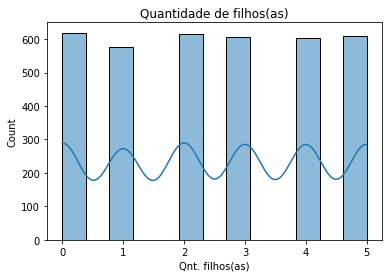

In [ ]:
# Histrograma da quantidade de filhos(as):
sns.histplot(train_data['Qnt. filhos(as)'], kde=True)
plt.title('Quantidade de filhos(as)')
#### Gráfico muito bem definido.

#### Valor 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Valor do plano de saúde (Boxplot)')

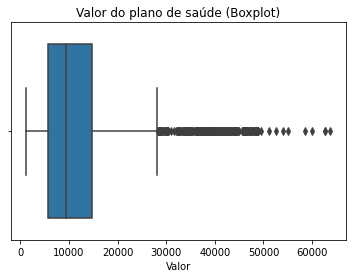

In [ ]:
# Boxplot do valor do plano de saúde:
sns.boxplot(train_data.Valor)
plt.title('Valor do plano de saúde (Boxplot)')
#### Existem outliers à direita. Ou seja, alguns clientes pagam um valor consideravelmente maior (provavelmente devido aos outliers do IMC).

Text(0.5, 1.0, 'Valor do plano de saúde')

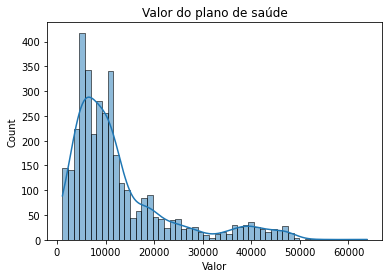

In [ ]:
# Histrograma do valor do plano de saúde:
sns.histplot(train_data.Valor, kde=True)
plt.title('Valor do plano de saúde')
#### Distribuição assimétrica à direita.

## 2º Pré-processamento dos dados

In [ ]:
# One Hot Encoding: transformação para representarmos uma variável categórica de forma binária, para ser possível elaborar as regressões.
train_data = pd.get_dummies (train_data, drop_first = True)
train_data.head(3)

,Idade,IMC,Qnt. filhos(as),Valor,Sexo_male,Fumante_yes,Região_northwest,Região_southeast,Região_southwest
0,21.000000,25.745000,2,3279.868550,1,0,0,0,0
1,36.976978,25.744165,3,21454.494239,0,1,0,1,0
2,18.000000,30.030000,1,1720.353700,1,0,0,1,0


In [ ]:
# Verificação da multicolinearidade (Variance Inflation Factor - VIF):
#### VIF = 1: menor multicolinearidade
#### VIF < 5: multicolinearidade moderada
#### VIF > 5: multicolinearidade extrema (devemos evitar)
import statsmodels.api as sm

def calculate_vif(data):
  vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
  x_var_names = train_data.columns

  for i in range(0, x_var_names.shape[0]):
    y = train_data[x_var_names[i]]
    x = train_data[x_var_names.drop([x_var_names[i]])]
    r_squared = sm.OLS(y,x).fit().rsquared
    vif = round(1/(1-r_squared),2)
    vif_df.loc[i] = [x_var_names[i],vif]
  return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

X=train_data.drop(['Valor'], axis = 1)
calculate_vif(X)

# As regiões apresentaram multicolinearidade de acordo com o esperado e, portanto, não será necessário excluir nenhuma delas.

,Var,Vif
1,IMC,14.37
0,Idade,11.95
3,Valor,8.15
2,Qnt. filhos(as),3.27
7,Região_southeast,0.56
6,Região_northwest,0.33
5,Fumante_yes,0.30
4,Sexo_male,0.28
8,Região_southwest,0.19


In [ ]:
# Reorganizando as colunas:
train_data = train_data[['Idade', 'Sexo_male', 'IMC', 'Fumante_yes', 'Qnt. filhos(as)', 'Região_northwest', 'Região_southeast', 'Região_southwest', 'Valor']]
train_data.head(3)

,Idade,Sexo_male,IMC,Fumante_yes,Qnt. filhos(as),Região_northwest,Região_southeast,Região_southwest,Valor
0,21.000000,1,25.745000,0,2,0,0,0,3279.868550
1,36.976978,0,25.744165,1,3,0,1,0,21454.494239
2,18.000000,1,30.030000,0,1,0,1,0,1720.353700


In [ ]:
# Determinando as variáveis em dependentes e independentes:
x = train_data.iloc[:, 0:8]
y = train_data.iloc[:, 8]

In [ ]:
# Verificando as variáveis X:
x.head()

,Idade,Sexo_male,IMC,Fumante_yes,Qnt. filhos(as),Região_northwest,Região_southeast,Região_southwest
0,21.000000,1,25.745000,0,2,0,0,0
1,36.976978,0,25.744165,1,3,0,1,0
2,18.000000,1,30.030000,0,1,0,1,0
3,37.000000,1,30.676891,0,3,0,0,0
4,58.000000,1,32.010000,0,1,0,1,0


In [ ]:
# Verificando a variável Y:
y.head()

0     3279.868550
1    21454.494239
2     1720.353700
3     6801.437542
4    11946.625900
Name: Valor, dtype: float64

In [ ]:
# Train Test Split (utilizando o conjunto de dados train para treinar o modelo e, com um conjunto de dados nunca visto antes, o test , ver como o modelo lida com dados novos):
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20, random_state=1)

## 3º Modelo de classificação

In [ ]:
# Importando a biblioteca de Machine Learning:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Regressão Linear:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(x_train, y_train)

# Predição:
y_pred = LinearRegression.predict(x_test)

# Pontuação:
# r2 - quanto mais próximo de 100%, melhor // mean_squared_error - quanto menor, melhor.
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))


0.8394714070983829
29954005.908322662


In [ ]:
# Regressão Ridge
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge = Ridge.fit(x_train, y_train)

# Predição:
y_pred = Ridge.predict(x_test)

# Pontuação:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8389823283568287
30045266.083530985


In [ ]:
# Regressão Lasso
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(x_train, y_train)

# Predição:
y_pred = Lasso.predict(x_test)

# Pontuação:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8393978673280267
29967728.141078394


In [ ]:
# Random Forest:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(x_train, y_train)

# Predição:
y_pred = RandomForestRegressor.predict(x_test)

# Pontuação:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.883464980484565
21744977.639162198


## 4º Modelo de classificação após normalização / padronização


#### Padronização

In [ ]:
# Padronizando os dados

# Importando as bibliotecas:
from sklearn.preprocessing import StandardScaler
# Gerando a nova escala (normalizando os dados):
scaler = StandardScaler().fit(x)
standardX = pd.DataFrame(scaler.transform(x), columns=x.columns, index=x.index)
# Sumarizando os dados transformados:
print("Dados originais: \n", train_data)
print("Dados normalizados: \n", rescaledX)

Dados originais: 
           Idade  Sexo_male        IMC  Fumante_yes  Qnt. filhos(as)  \
0     21.000000          1  25.745000            0                2   
1     36.976978          0  25.744165            1                3   
2     18.000000          1  30.030000            0                1   
3     37.000000          1  30.676891            0                3   
4     58.000000          1  32.010000            0                1   
...         ...        ...        ...          ...              ...   
3625  48.820767          0  41.426984            0                4   
3626  38.661977          0  26.202557            0                2   
3627  56.000000          1  40.300000            0                0   
3628  48.061207          0  34.930624            0                1   
3629  37.598865          0  25.219233            0                3   

      Região_northwest  Região_southeast  Região_southwest         Valor  
0                    0                 0             

In [ ]:
# Train Test Split:
x_train, x_test, y_train, y_test = train_test_split(rescaledX, y, test_size=20, random_state=1)

In [ ]:
# Regressão Linear:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(x_train, y_train)

# Predição:
y_pred = LinearRegression.predict(x_test)

# Pontuação:
# r2 - quanto mais próximo de 100%, melhor // mean_squared_error - quanto menor, melhor.
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8394714070983824
29954005.90832273


In [ ]:
# Regressão Ridge
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge = Ridge.fit(x_train, y_train)

# Predição:
y_pred = Ridge.predict(x_test)

# Pontuação:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.838358003335434
30161762.684177272


In [ ]:
# Regressão Lasso
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(x_train, y_train)

# Predição:
y_pred = Lasso.predict(x_test)

# Pontuação:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8392167314985248
30001527.376523208


In [ ]:
# Random Forest:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(x_train, y_train)

# Predição:
y_pred = RandomForestRegressor.predict(x_test)

# Pontuação:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8826041849225885
21905598.71534083


#### Normalização

In [ ]:
# Normalizando os dados

# Importando as bibliotecas:
from sklearn.preprocessing import MinMaxScaler
# Gerando a nova escala (normalizando os dados):
scaler = MinMaxScaler(feature_range = (0,1))
rescaledX = pd.DataFrame(scaler.fit_transform(x), columns=x.columns, index=x.index)
# Sumarizando os dados transformados:
print("Dados originais: \n", train_data)
print("Dados normalizados: \n", rescaledX)

Dados originais: 
           Idade  Sexo_male        IMC  Fumante_yes  Qnt. filhos(as)  \
0     21.000000          1  25.745000            0                2   
1     36.976978          0  25.744165            1                3   
2     18.000000          1  30.030000            0                1   
3     37.000000          1  30.676891            0                3   
4     58.000000          1  32.010000            0                1   
...         ...        ...        ...          ...              ...   
3625  48.820767          0  41.426984            0                4   
3626  38.661977          0  26.202557            0                2   
3627  56.000000          1  40.300000            0                0   
3628  48.061207          0  34.930624            0                1   
3629  37.598865          0  25.219233            0                3   

      Região_northwest  Região_southeast  Região_southwest         Valor  
0                    0                 0             

In [ ]:
# Train Test Split:
x_train, x_test, y_train, y_test = train_test_split(rescaledX, y, test_size=20, random_state=1)

In [ ]:
# Regressão Linear:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(x_train, y_train)

# Predição:
y_pred = LinearRegression.predict(x_test)

# Pontuação:
# r2 - quanto mais próximo de 100%, melhor // mean_squared_error - quanto menor, melhor.
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8394714070983824
29954005.90832273


In [ ]:
# Regressão Ridge
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge = Ridge.fit(x_train, y_train)

# Predição:
y_pred = Ridge.predict(x_test)

# Pontuação:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.838358003335434
30161762.684177272


In [ ]:
# Regressão Lasso
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(x_train, y_train)

# Predição:
y_pred = Lasso.predict(x_test)

# Pontuação:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8392167314985248
30001527.376523208


In [ ]:
# Random Forest:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(x_train, y_train)

# Predição:
y_pred = RandomForestRegressor.predict(x_test)

# Pontuação:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8890724106227996
20698653.165402398


## 5º Salvamento do modelo para deploy ou implementação

###### O modelo que apresentou melhores resultados foi o Random Forest feito após normalização dos dados. Portanto, iremos utilizá-lo como máquina preditiva.

In [ ]:
# Criando um arquivo .pkl
import pickle

filename = 'PrevisãoDeCustoAnual (PlanoDeSaúde).pkl'
pickle.dump(RandomForestRegressor, open(filename,'wb'))